在本书后续部分中，我将使用下面这样的pandas引入约定：

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

### 5.1 pandas的数据结构介绍
要使用pandas，你首先就得熟悉它的两个主要数据结构：Series和DataFrame。虽然它们并不能解决所有问题，但它们为大多数应用提供了一种可靠的、易于使用的基础。

### #Series
Series是一种类似于一维数组的对象，它由一组数据（各种NumPy数据类型）以及一组与之相关的数据标签（即索引）组成。仅由一组数据即可产生最简单的Series：

In [2]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

Series的字符串表现形式为：索引在左边，值在右边。由于我们没有为数据指定索引，于是会自动创建一个0到N-1（N为数据的长度）的整数型索引。你可以通过Series 的values和index属性获取其数组表示形式和索引对象：

In [3]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [4]:
obj.index  # like range(4)

RangeIndex(start=0, stop=4, step=1)

通常，我们希望所创建的Series带有一个可以对各个数据点进行标记的索引：

In [5]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

与普通NumPy数组相比，你可以通过索引的方式选取Series中的单个或一组值：

In [6]:
print(obj2['a'])
obj2['d'] = 6 #赋值
print(obj2[['c', 'a', 'd']])


-5
c    3
a   -5
d    6
dtype: int64


['c', 'a', 'd']是索引列表，即使它包含的是字符串而不是整数。

使用NumPy函数或类似NumPy的运算（如根据布尔型数组进行过滤、标量乘法、应用数学函数等）都会保留索引值的链接：

In [8]:
 obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [9]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

还可以将Series看成是一个定长的有序字典，因为它是索引值到数据值的一个映射。它可以用在许多原本需要字典参数的函数中：

In [10]:
'b' in obj2

True

In [11]:
'e' in obj2

False

如果数据被存放在一个Python字典中，也可以直接通过这个字典来创建Series：

In [12]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

如果只传入一个字典，则结果Series中的索引就是原字典的键（有序排列）。你可以传入排好序的字典的键以改变顺序：

In [16]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

在这个例子中，sdata中跟states索引相匹配的那3个值会被找出来并放到相应的位置上，但由于"California"所对应的sdata值找不到，所以其结果就为NaN（即“非数字”（not a number），在pandas中，它用于表示缺失或NA值）。因为‘Utah’不在states中，它被从结果中除去。

我将使用缺失（missing）或NA表示缺失数据。pandas的isnull和notnull函数可用于检测缺失数据：

In [14]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [15]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Series也有类似的实例方法：

In [17]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

对于许多应用而言，Series最重要的一个功能是，它会根据运算的索引标签自动对齐数据：

In [18]:
print(obj3)
print(obj4)
print(obj3 + obj4)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


Series对象本身及其索引都有一个name属性，该属性跟pandas其他的关键功能关系非常密切：

In [19]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Series的索引可以通过赋值的方式就地修改：

In [20]:
obj
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### #DataFrame
DataFrame是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔值等）。DataFrame既有行索引也有列索引，它可以被看做由Series组成的字典（共用同一个索引）。DataFrame中的数据是以一个或多个二维块存放的（而不是列表、字典或别的一维数据结构）。

建DataFrame的办法有很多，最常用的一种是直接传入一个由等长列表或NumPy数组组成的字典：

In [22]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

结果DataFrame会自动加上索引（跟Series一样），且全部列会被有序排列：

In [23]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [24]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


如果指定了列序列，则DataFrame的列就会按照指定顺序进行排列：

In [25]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


如果传入的列在数据中找不到，就会在结果中产生缺失值：

In [26]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                       index=['one', 'two', 'three', 'four',
                            'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [27]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

行也可以通过位置或名称的方式进行获取，比如用loc属性（稍后将对此进行详细讲解）：

In [28]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

列可以通过赋值的方式进行修改。例如，我们可以给那个空的"debt"列赋上一个标量值或一组值：

In [29]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [33]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


将列表或数组赋值给某个列时，其长度必须跟DataFrame的长度相匹配。如果赋值的是一个Series，就会精确匹配DataFrame的索引，所有的空位都将被填上缺失值：

In [34]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


为不存在的列赋值会创建出一个新列。关键字del用于删除列。

作为del的例子，我先添加一个新的布尔值的列，state是否为'Ohio'：

In [35]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


del方法可以用来删除这列：

In [36]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

另一种常见的数据形式是嵌套字典：

如果嵌套字典传给DataFrame，pandas就会被解释为：外层字典的键作为列，内层键则作为行索引：

In [2]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


你也可以使用类似NumPy数组的方法，对DataFrame进行转置（交换行和列）：

In [38]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


内层字典的键会被合并、排序以形成最终的索引。如果明确指定了索引，则不会这样：


In [3]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


#### 表5-1列出了DataFrame构造函数所能接受的各种数据。
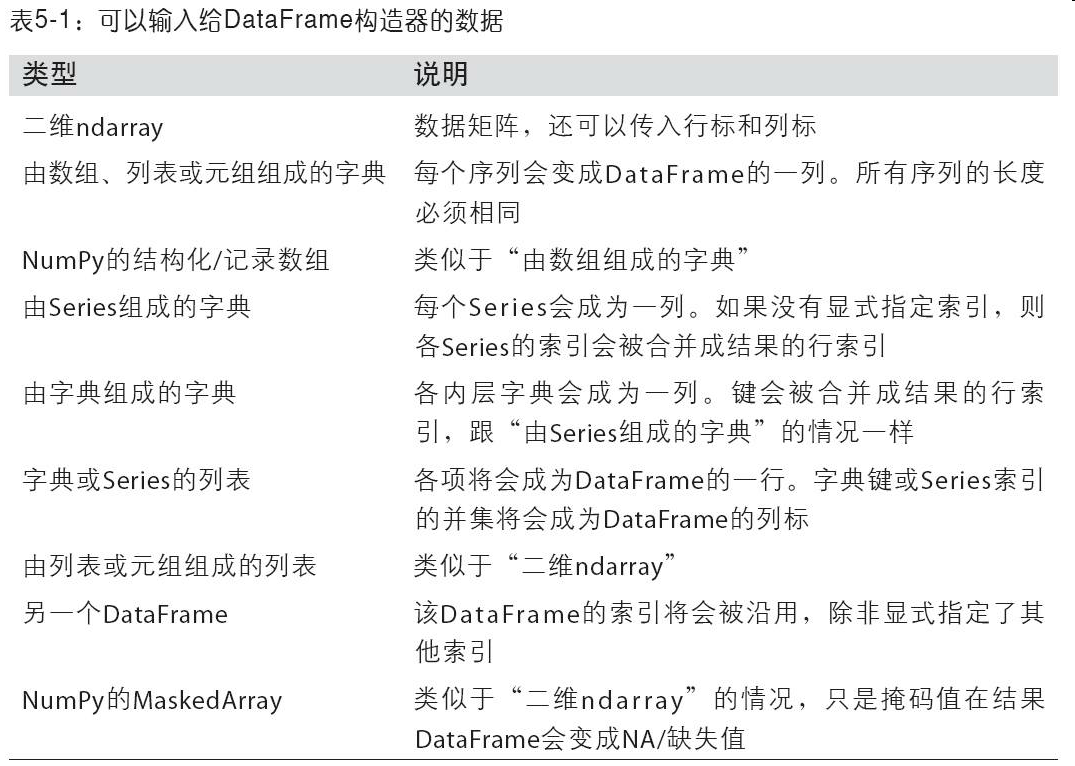

#### 如果设置了DataFrame的index和columns的name属性，则这些信息也会被显示出来：

In [4]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


跟Series一样，values属性也会以二维ndarray的形式返回DataFrame中的数据：

In [5]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

#### #索引对象
pandas的索引对象负责管理轴标签和其他元数据（比如轴名称等）。构建Series或DataFrame时，所用到的任何数组或其他序列的标签都会被转换成一个Index：

In [6]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [7]:
obj

a    0
b    1
c    2
dtype: int64

In [8]:
index[1:]

Index(['b', 'c'], dtype='object')

##### Index对象是不可变的，因此用户不能对其进行修改：

除了类似于数组，Index的功能也类似一个固定大小的集合：

In [10]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [11]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [12]:
'Ohio' in frame3.columns

True

In [13]:
2003 in frame3.index

False

与python的集合不同，pandas的Index可以包含重复的标签：

In [14]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

选择重复的标签，会显示所有的结果。

每个索引都有一些方法和属性，它们可用于设置逻辑并回答有关该索引所包含的数据的常见问题。表5-2列出了这些函数。
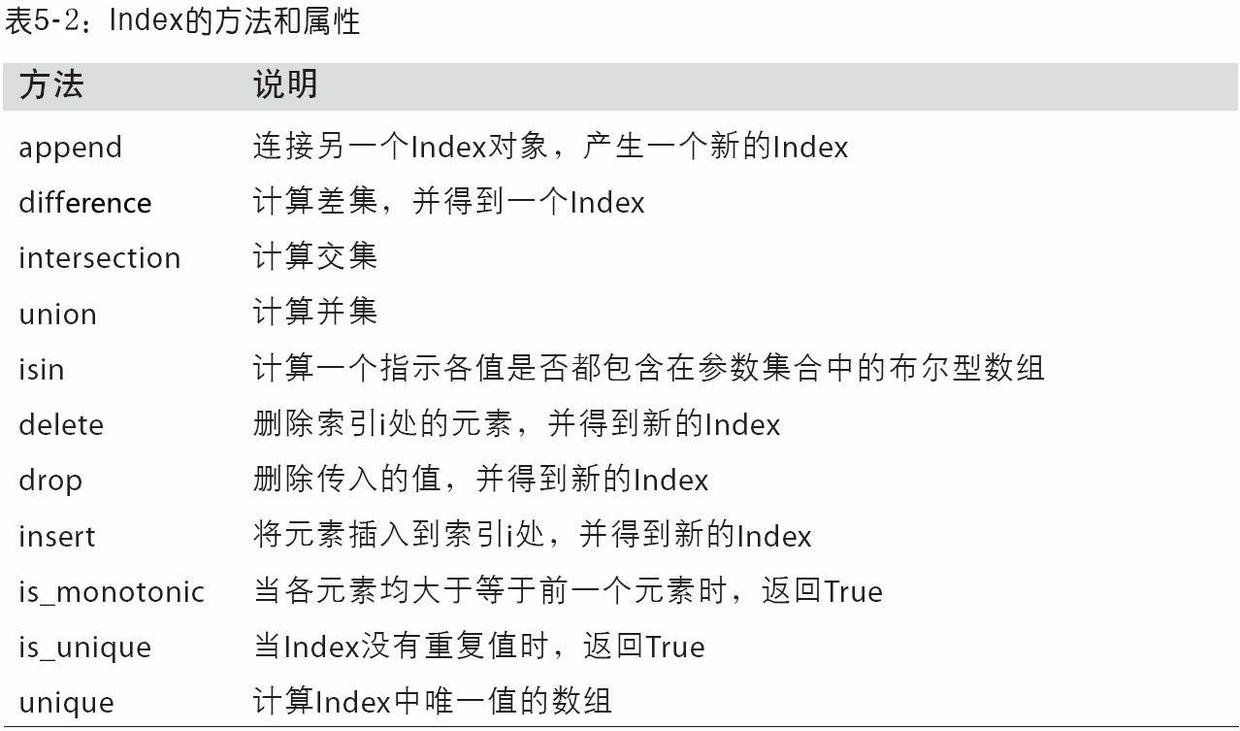

In [15]:
dup_labels.unique()#如

Index(['foo', 'bar'], dtype='object')

### 5.2 基本功能
本节中，我将介绍操作Series和DataFrame中的数据的基本手段。后续章节将更加深入地挖掘pandas在数据分析和处理方面的功能。本书不是pandas库的详尽文档，主要关注的是最重要的功能，那些不大常用的内容（也就是那些更深奥的内容）就交给你自己去摸索吧。
#### #重新索引
pandas对象的一个重要方法是reindex，其作用是创建一个新对象，它的数据符合新的索引。看下面的例子：

In [23]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [24]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

用该Series的reindex将会根据新索引进行重排。如果某个索引值当前不存在，就引入缺失值：

In [25]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

对于时间序列这样的有序数据，重新索引时可能需要做一些插值处理。method选项即可达到此目的，例如，使用ffill可以实现前向值填充：

In [26]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [27]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

借助DataFrame，reindex可以修改（行）索引和列。只传递一个序列时，会重新索引结果的行：

In [28]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [29]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


列可以用columns关键字重新索引：

In [30]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


#### #丢弃指定轴上的项
丢弃某条轴上的一个或多个项很简单，只要有一个索引数组或列表即可。由于需要执行一些数据整理和集合逻辑，所以drop方法返回的是一个在指定轴上删除了指定值的新对象：

In [31]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [32]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [33]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

对于DataFrame，可以删除任意轴上的索引值。为了演示，先新建一个DataFrame例子：

In [35]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


用标签序列调用drop会从行标签（默认：axis 0）删除值：

In [36]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


通过传递axis=1或axis='columns'可以删除列的值：

In [38]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [42]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


许多函数，如drop，会修改Series或DataFrame的大小或形状，可以就地修改对象，不会返回新的对象：

小心使用inplace，它会销毁所有被删除的数据。

In [43]:
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

#### #索引、选取和过滤

Series索引（obj[...]）的工作方式类似于NumPy数组的索引，只不过Series的索引值不只是整数。下面是几个例子：

In [44]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [45]:
print(obj['b'])
print(obj[1])
print(obj[2:4])
print(obj[['b', 'a', 'd']])
print(obj[[1, 3]])

1.0
1.0
c    2.0
d    3.0
dtype: float64
b    1.0
a    0.0
d    3.0
dtype: float64
b    1.0
d    3.0
dtype: float64


In [46]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

用一个值或序列对DataFrame进行索引其实就是获取一个或多个列：

In [48]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
print(data)
print(data['two'])
print(data[['three', 'one']])

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32
          three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12


这种索引方式有几个特殊的情况。首先通过切片或布尔型数组选取数据：

In [55]:
data[:2]


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [56]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


选取行的语法data[:2]十分方便。向[ ]传递单一的元素或列表，就可选择列。

#### #用loc和iloc进行选取
对于DataFrame的行的标签索引，我引入了特殊的标签运算符loc和iloc。它们可以让你用类似NumPy的标记，使用轴标签（loc）或整数索引（iloc），从DataFrame选择行和列的子集。

作为一个初步示例，让我们通过标签选择一行和多列：

In [57]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

然后用iloc和整数进行选取：

In [58]:
data.iloc[2, [3, 0, 1]] #不是从0开始的

four    11
one      8
two      9
Name: Utah, dtype: int32

In [59]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [60]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,4,5
Utah,11,8,9


这两个索引函数也适用于一个标签或多个标签的切片：

In [61]:
data.loc[:'Utah', 'two']

Ohio        1
Colorado    5
Utah        9
Name: two, dtype: int32

In [62]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


#### 建议使用loc（标签）或iloc（整数）：
所以，在pandas中，有多个方法可以选取和重新组合数据。对于DataFrame，表5-4进行了总结。后面会看到，还有更多的方法进行层级化索引。
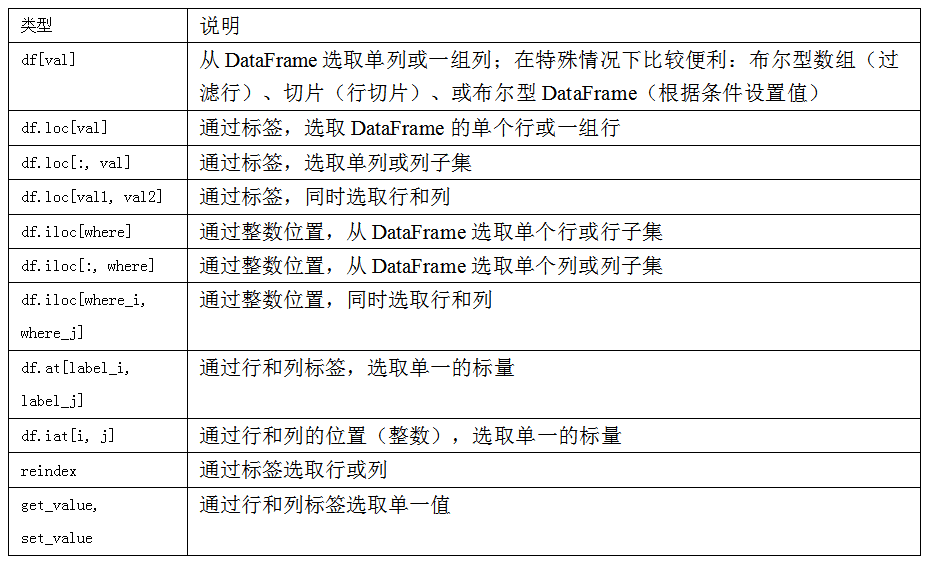

#### #算术运算和数据对齐
pandas最重要的一个功能是，它可以对不同索引的对象进行算术运算。在将对象相加时，如果存在不同的索引对，则结果的索引就是该索引对的并集。对于有数据库经验的用户，这就像在索引标签上进行自动外连接。看一个简单的例子：

In [37]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [3]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

将它们相加就会产生：

In [4]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

自动的数据对齐操作在不重叠的索引处引入了NA值。缺失值会在算术运算过程中传播。

对于DataFrame，对齐操作会同时发生在行和列上：

In [5]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(df1)
print(df2)

            b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0
          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0


把它们相加后将会返回一个新的DataFrame，其索引和列为原来那两个DataFrame的并集：

In [6]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


因为'c'和'e'列均不在两个DataFrame对象中，在结果中以缺省值呈现。行也是同样。

如果DataFrame对象相加，没有共用的列或行标签，结果都会是空：

In [7]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
print(df1)
print(df2)
df1 - df2

   A
0  1
1  2
   B
0  3
1  4


,A,B
0,NaN,NaN
1,NaN,NaN


#### #DataFrame和Series之间的运算(广播)
跟不同维度的NumPy数组一样，DataFrame和Series之间算术运算也是有明确规定的。先来看一个具有启发性的例子，计算一个二维数组与其某行之间的差：

In [8]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [9]:
arr[0]

array([0., 1., 2., 3.])

In [10]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

当我们从arr减去arr[0]，每一行都会执行这个操作。这就叫做广播（broadcasting），附录A将对此进行详细讲解。DataFrame和Series之间的运算差不多也是如此：

In [11]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
print(frame)
print(series)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64


默认情况下，DataFrame和Series之间的算术运算会将Series的索引匹配到DataFrame的列，然后沿着行一直向下广播：

In [12]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


如果你希望匹配行且在列上广播，则必须使用算术运算方法。例如：

In [13]:
series3 = frame['d']
print(frame)
print(series3)
frame.sub(series3, axis='index')

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64


,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


传入的轴号就是希望匹配的轴。在本例中，我们的目的是匹配DataFrame的行索引（axis='index' or axis=0）并进行广播。

#### #函数应用和映射
NumPy的ufuncs（元素级数组方法）也可用于操作pandas对象：

In [15]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.021815,0.914955,2.444245
Ohio,-0.103620,0.127148,-0.077687
Texas,-3.039676,-0.287167,-1.002827
Oregon,0.522766,-1.705906,0.249344


In [16]:
np.abs(frame)

,b,d,e
Utah,0.021815,0.914955,2.444245
Ohio,0.103620,0.127148,0.077687
Texas,3.039676,0.287167,1.002827
Oregon,0.522766,1.705906,0.249344


另一个常见的操作是，将函数应用到由各列或行所形成的一维数组上。DataFrame的apply方法即可实现此功能：

In [17]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    3.562442
d    2.620861
e    3.447072
dtype: float64

这里的函数f，计算了一个Series的最大值和最小值的差，在frame的每列都执行了一次。结果是一个Series，使用frame的列作为索引。

如果传递axis='columns'到apply，这个函数会在每行执行：

In [19]:
frame.apply(f, axis='columns')

Utah      2.422430
Ohio      0.230769
Texas     2.752508
Oregon    2.228672
dtype: float64

许多最为常见的数组统计功能都被实现成DataFrame的方法（如sum和mean），因此无需使用apply方法。

元素级的Python函数也是可以用的。假如你想得到frame中各个浮点值的格式化字符串，使用applymap即可：

In [20]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,0.02,0.91,2.44
Ohio,-0.10,0.13,-0.08
Texas,-3.04,-0.29,-1.00
Oregon,0.52,-1.71,0.25


#### #排序和排名
根据条件对数据集排序（sorting）也是一种重要的内置运算。要对行或列索引进行排序（按字典顺序），可使用sort_index方法，它将返回一个已排序的新对象：

In [21]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

对于DataFrame，则可以根据任意一个轴上的索引进行排序：

In [22]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_index()


,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [23]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


数据默认是按升序排序的，但也可以降序排序：

In [24]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


若要按值对Series进行排序，可使用其sort_values方法：

In [25]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

当排序一个DataFrame时，你可能希望根据一个或多个列中的值进行排序。将一个或多个列的名字传递给sort_values的by选项即可达到该目的：

In [26]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [27]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


要根据多个列进行排序，传入名称的列表即可：

In [28]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


接下来介绍Series和DataFrame的rank方法。默认情况下，rank是通过“为各组分配一个平均排名”的方式破坏平级关系的：

In [29]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

也可以根据值在原数据中出现的顺序给出排名：

In [30]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

这里，条目0和2没有使用平均排名6.5，它们被设成了6和7，因为数据中标签0位于标签2的前面。

你也可以按降序进行排名

In [31]:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

表5-6列出了所有用于破坏平级关系的method选项。DataFrame可以在行或列上计算排名：
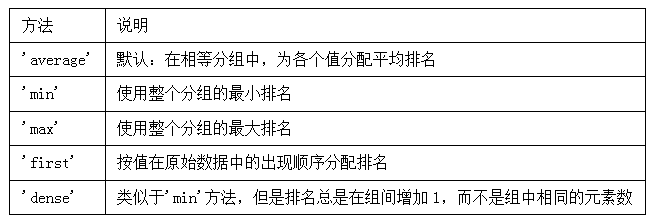

In [32]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [33]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


#### #带有重复标签的轴索引
直到目前为止，我所介绍的所有范例都有着唯一的轴标签（索引值）。虽然许多pandas函数（如reindex）都要求标签唯一，但这并不是强制性的。我们来看看下面这个简单的带有重复索引值的Series：

In [34]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

索引的is_unique属性可以告诉你它的值是否是唯一的：

In [35]:
obj.index.is_unique

False

对于带有重复值的索引，数据选取的行为将会有些不同。如果某个索引对应多个值，则返回一个Series；而对应单个值的，则返回一个标量值：

In [36]:
print(obj['a'])
print(obj['c'])

a    0
a    1
dtype: int64
4


### 5.3 汇总和计算描述统计
pandas对象拥有一组常用的数学和统计方法。它们大部分都属于约简和汇总统计，用于从Series中提取单个值（如sum或mean）或从DataFrame的行或列中提取一个Series。跟对应的NumPy数组方法相比，它们都是基于没有缺失数据的假设而构建的。看一个简单的DataFrame：

In [38]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


调用DataFrame的sum方法将会返回一个含有列的和的Series：

In [39]:
df.sum()

one    9.25
two   -5.80
dtype: float64

传入axis='columns'或axis=1将会按行进行求和运算：

In [40]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

NA值会自动被排除，除非整个切片（这里指的是行或列）都是NA。通过skipna选项可以禁用该功能：

In [41]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

#### #表5-7列出了这些约简方法的常用选项。
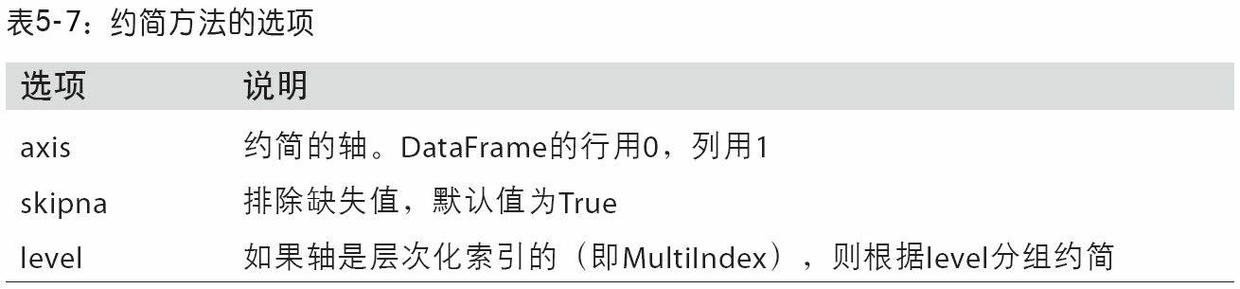

有些方法（如idxmin和idxmax）返回的是间接统计（比如达到最小值或最大值的索引）：

In [42]:
df.idxmax()

one    b
two    d
dtype: object

另一些方法则是累计型的：

In [43]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


还有一种方法，它既不是约简型也不是累计型。describe就是一个例子，它用于一次性产生多个汇总统计：

In [44]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


#### #表5-8列出了所有与描述统计相关的方法。
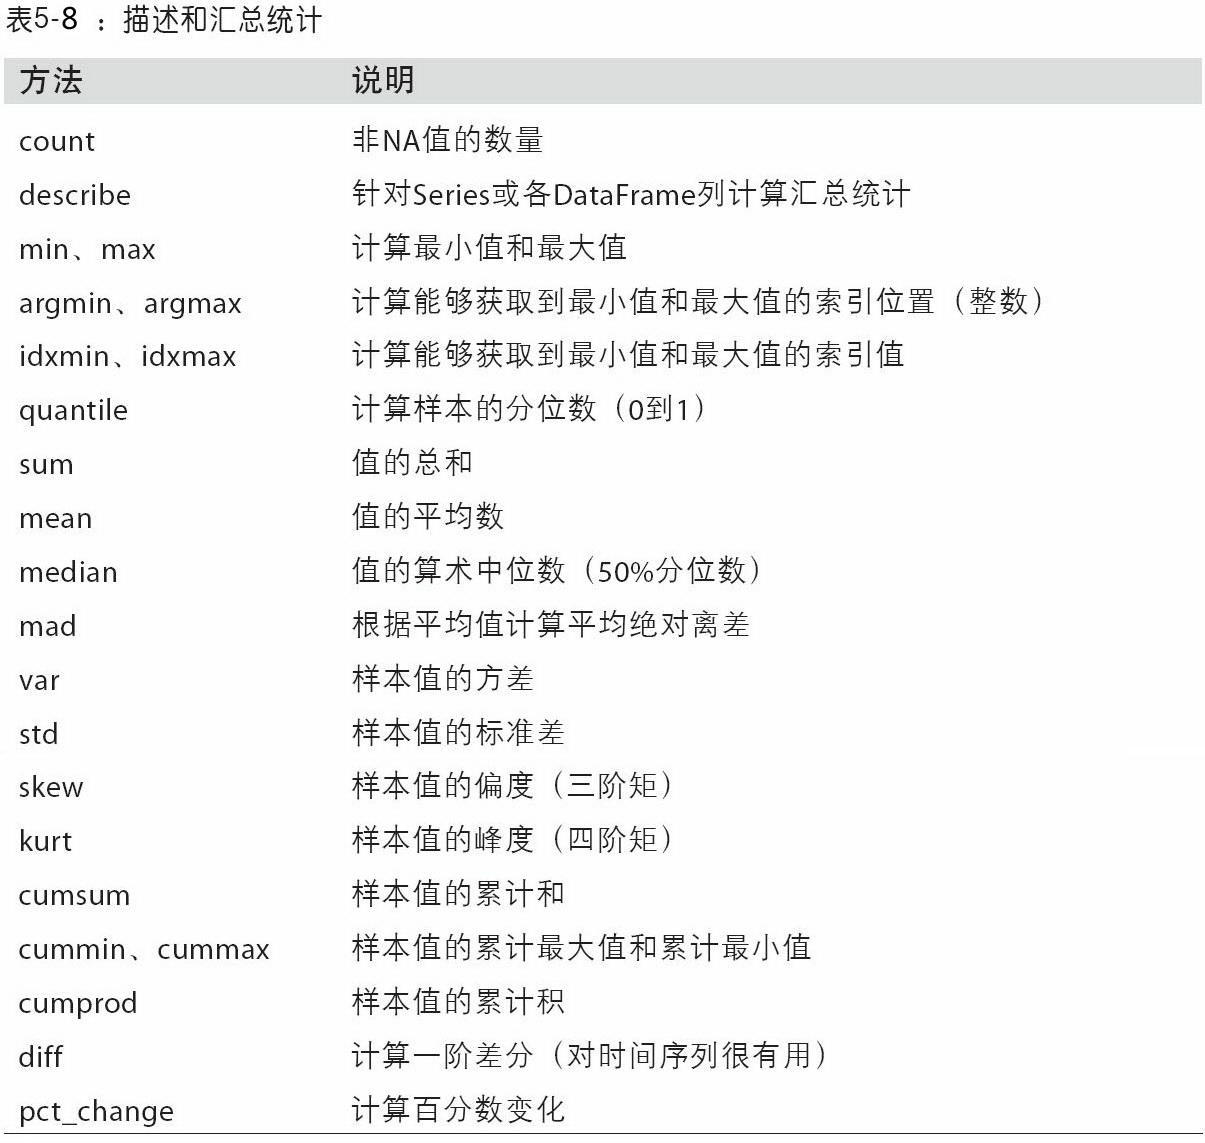

#### #唯一值、值计数以及成员资格
还有一类方法可以从一维Series的值中抽取信息。看下面的例子：

In [45]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

第一个函数是unique，它可以得到Series中的唯一值数组：

In [46]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

返回的唯一值是未排序的，如果需要的话，可以对结果再次进行排序（uniques.sort()）。相似的，value_counts用于计算一个Series中各值出现的频率：

In [47]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

为了便于查看，结果Series是按值频率降序排列的。value_counts还是一个顶级pandas方法，可用于任何数组或序列：

In [48]:
pd.value_counts(obj.values, sort=False)

b    2
d    1
a    3
c    3
dtype: int64

isin用于判断矢量化集合的成员资格，可用于过滤Series中或DataFrame列中数据的子集：

In [49]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [50]:
mask = obj.isin(['b', 'c'])

In [51]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [52]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

与isin类似的是Index.get_indexer方法，它可以给你一个索引数组，从可能包含重复值的数组到另一个不同值的数组：

In [53]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

#### #表5-9给出了这几个方法的一些参考信息。
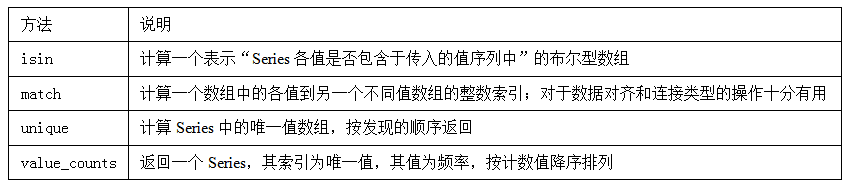